# Objective :


Segment the customers based on their purchase behavior.

## Tasks to be Performed:


      1.	Derive some relevant insights(Min 4-5) out of the given data using different approaches
            Such as using Seaborn/Matplotlib or Cross tabulation.
            
      2.	Perform data pre-processing wherever needed.
      
      3.    Segmentation Using PCA.
	  3.1.  Do necessary steps to apply PCA on the raw data.
	  3.2.  Find number of optimat PCs to be considered.
      3.3.  Apply PCA using the optimal number.
	  3.4.  Perform KMeans and Hierarchical clustering using Optimal number of clusters in both the cases on PCA transformed                       data.
 	  3.5.  Finally do a cluster analysis of each segment.
      
      4.    Segmentation without using PCA.
	  4.1.  Take raw data as input and final number of optimal cluster for both KMeans and Hierarchical cluster.
	  4.2.  Perform KMeans and Hierarchical clustering using Optimal number of clusters in both the cases.
	  4.3.  Finally do a cluster analysis of each segment.


# Solution:

# 1. Import all necessary modules and load the data

In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Print 50 samples from the dataset

In [3]:
#Loading the dataset


In [3]:
df.tail(50)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
150,151,Male,43,78.0,17.0
151,152,Male,39,78.0,88.0
152,153,Female,44,78.0,20.0
153,154,Female,38,78.0,76.0
154,155,Female,47,78.0,16.0
155,156,Female,27,78.0,89.0
156,157,Male,37,78.0,1.0
157,158,Female,30,78.0,78.0
158,159,Male,34,78.0,1.0
159,160,Female,30,78.0,73.0


# 3. Print the datatypes of each column and the shape of the dataset

In [4]:
df.dtypes

CustomerID                  int64
Genre                      object
Age                         int64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [5]:
# Shape of the data

df.shape

(200, 5)

In [6]:
# Checking for missing values

df.isna().sum()

CustomerID                 0
Genre                     11
Age                        0
Annual Income (k$)        20
Spending Score (1-100)     6
dtype: int64

There are only 11 'Genre' out of 200, 20 'Annual Income (k$)' out of 200 and 6 'Spending Score' out of 200 datasets are missing. So, we can replace 'Genre' column, 'Annual Income' column and 'Spending Score' column NaN values with their respected mode, median values and mean values.

In [7]:
df_new = df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].median(),inplace=True)

In [8]:
# Here replacing NaN values with mean values because range of spending score is 1 to 100

df_new = df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean(),inplace=True)

In [9]:
# The following code loops through each column and checks whether the column type is 'object' or not. If found 'object', then
# converts them into categorical with each distinct value becoming category or code.

for feature in df.columns:                                  # Loop through all the columns in the DataFrame
    if df[feature].dtype == 'object':                       # Only apply for columns with categorical strings
       df[feature] = pd.Categorical(df[feature]).codes      # Replace strings with an integer

In [10]:
df_new = df['Genre'].replace(-1, 0, inplace=True)

In [11]:
# Also CustomerID column does not contribute any insights. So, dropping CustomerID column

df_new = df.drop(['CustomerID'], axis=1, inplace = True)

In [12]:
df_new = df.astype('int64')  # Converting all 'float' type values to 'int64' type

In [13]:
df_new.head(50)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [14]:
df_new.tail(50)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
150,1,43,78,17
151,1,39,78,88
152,0,44,78,20
153,0,38,78,76
154,0,47,78,16
155,0,27,78,89
156,1,37,78,1
157,0,30,78,78
158,1,34,78,1
159,0,30,78,73


In [15]:
df_new.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# Checking the info of the dataset

df_new.info()

#'Genre' column is of type object, i.e. 'strings'. This column need to be converted into numerical column as PCA cannot 
# work on 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Genre                     200 non-null int64
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4)
memory usage: 6.4 KB


# 4. Print the descriptive statistics of each & every column using describe() function

In [17]:
# Description of DataFrame

df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Genre,200.0,0.405,0.492124,0.0,0.00,0.0,1.00,1.0
Age,200.0,38.850,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,59.760,26.195293,15.0,41.50,58.0,78.00,137.0
Spending Score (1-100),200.0,50.210,25.315415,1.0,35.00,50.0,71.25,99.0


In [18]:
# Class distribution among Male and Female. Here 0 stands for 'Female' and 1 stands for 'Male'

df_new.groupby(['Genre']).count()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
0,119,119,119
1,81,81,81


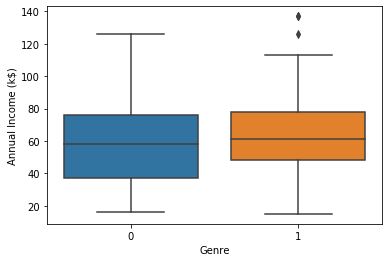

In [20]:
sns.boxplot(x="Genre",y = "Annual Income (k$)", data=df_new)

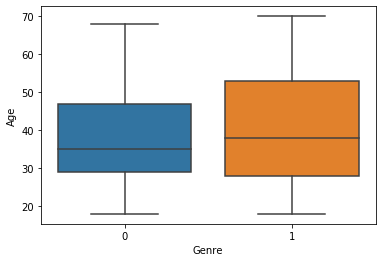

In [21]:
sns.boxplot(x="Genre",y = "Age", data=df_new)

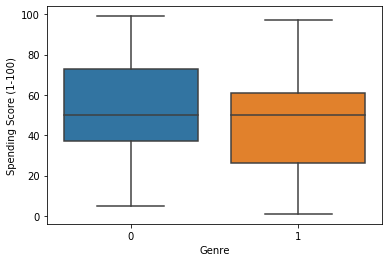

In [22]:
sns.boxplot(x="Genre",y = "Spending Score (1-100)", data=df_new)

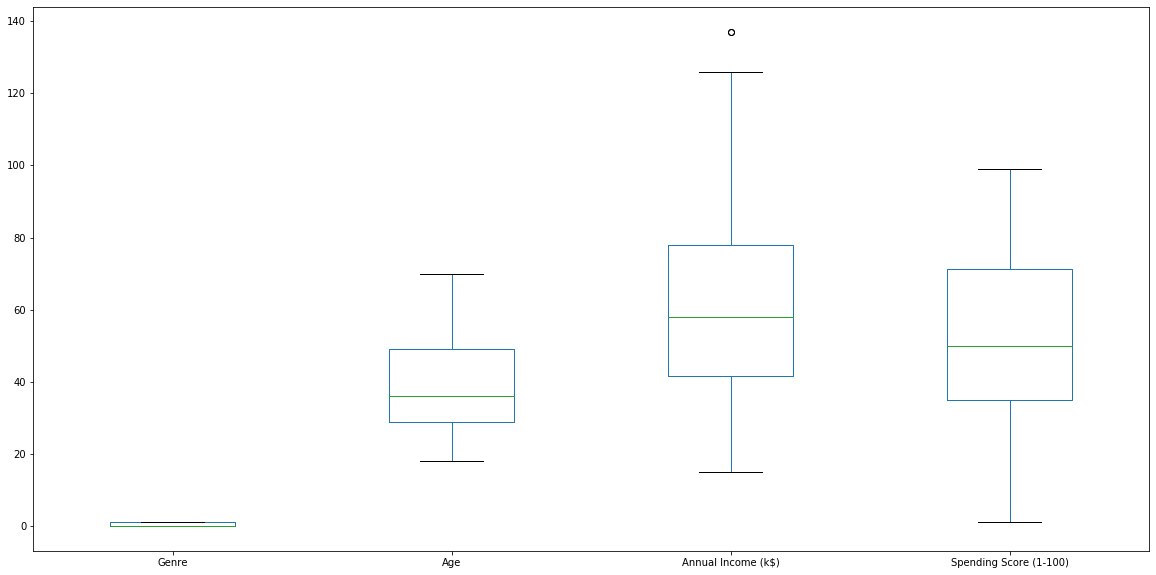

In [23]:
df_new.plot(kind='box', figsize=(20,10))
plt.show()

No Significant outliers are present. So, outliers treatment not required.

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


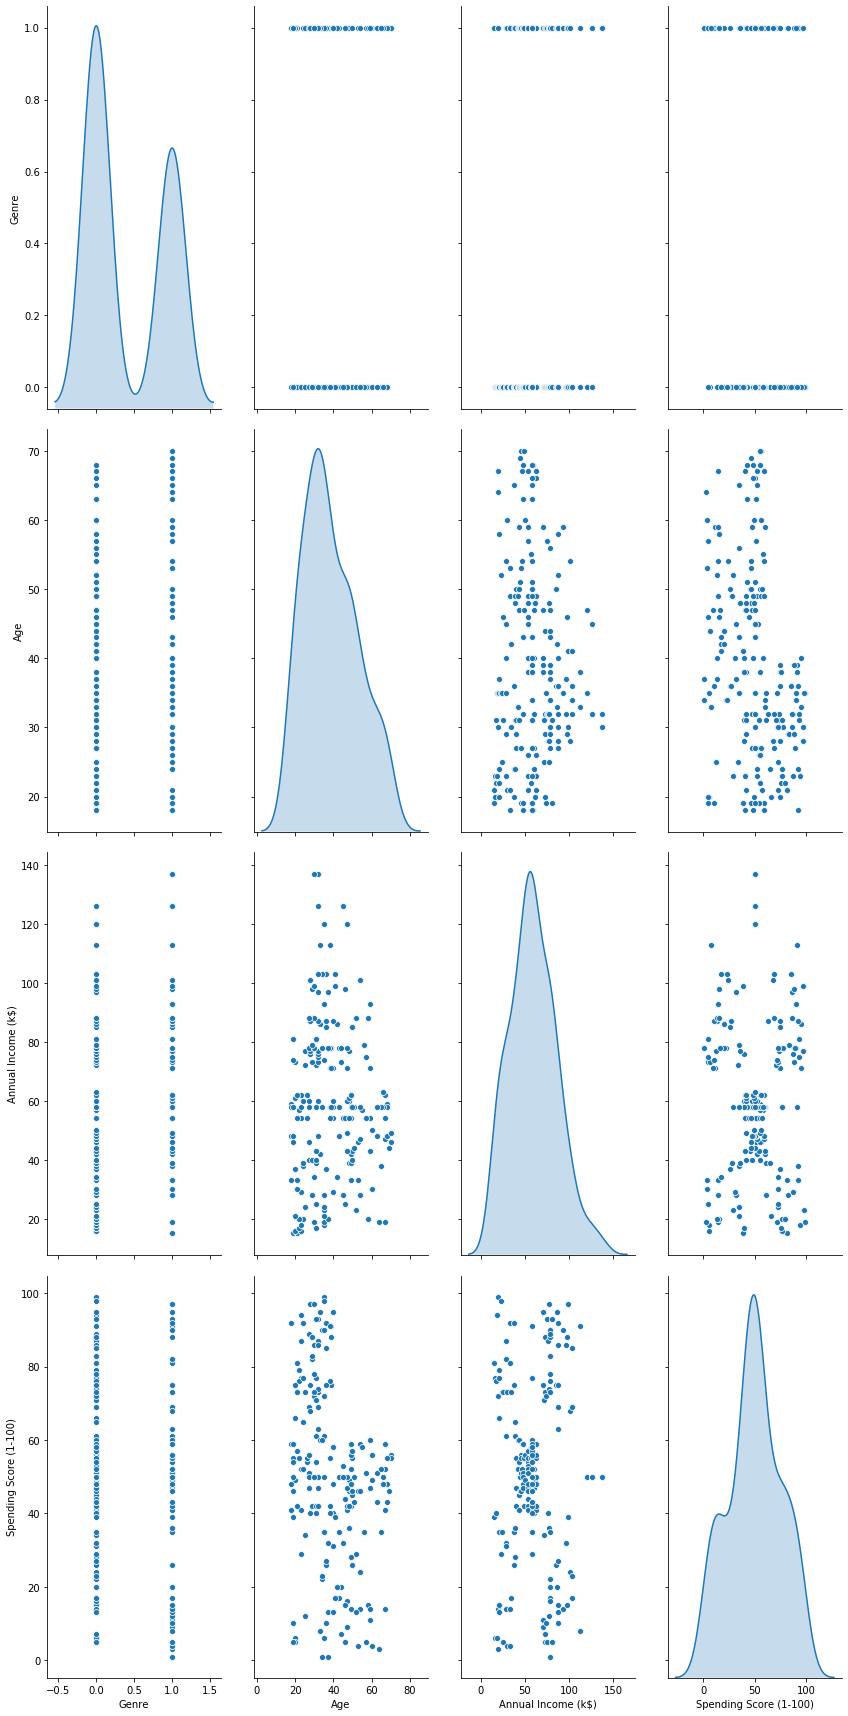

In [24]:
#KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable

sns.pairplot(df_new, size = 6, aspect = 0.5, diag_kind = 'kde')   # Kernel Density Estimation plot
plt.show()

In [25]:
pd.crosstab(index=df_new["Age"],columns=df_new["Genre"],normalize="index")

Genre,0,1
Age,,
18,0.250000,0.750000
19,0.250000,0.750000
20,0.600000,0.400000
21,0.800000,0.200000
22,1.000000,0.000000
23,1.000000,0.000000
24,0.500000,0.500000
25,0.666667,0.333333
26,0.000000,1.000000


In [26]:
df_new.Genre.value_counts()

0    119
1     81
Name: Genre, dtype: int64

In [27]:
df_new.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

In [28]:
print(df_new.Genre.unique())
print(df_new.Age.unique())
print(df_new)

[1 0]
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
     Genre  Age  Annual Income (k$)  Spending Score (1-100)
0        1   19                  15                      39
1        1   21                  15                      81
2        0   20                  16                       6
3        0   23                  16                      77
4        0   31                  17                      40
..     ...  ...                 ...                     ...
195      0   35                 120                      50
196      0   45                 126                      50
197      1   32                 126                      50
198      1   32                 137                      50
199      1   30                 137                      50

[200 rows x 4 columns]


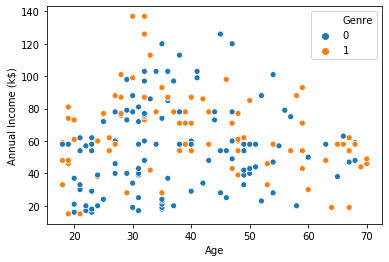

In [29]:
# Checking for multicolinearity among independent attributes

# Plotting scatterplot between 'Age' and 'Annual Income (k$)'

sns.scatterplot(x='Age',y='Annual Income (k$)', hue = 'Genre', data=df_new)
plt.show()

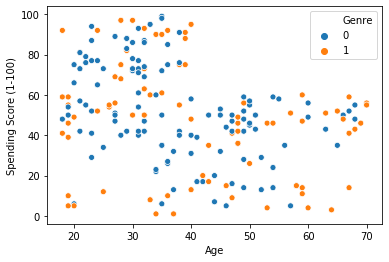

In [30]:
# Plotting scatterplot between 'Age' and 'Spending Score (1-100)'

sns.scatterplot(x='Age',y='Spending Score (1-100)', hue = 'Genre', data=df_new)
plt.show()

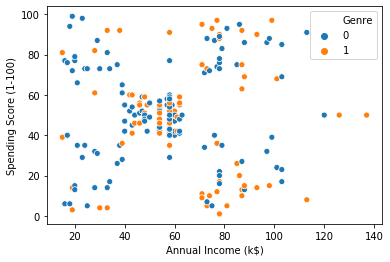

In [31]:
# Plotting scatterplot between 'Annual Income (k$)' and 'Spending Score (1-100)'

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', hue = 'Genre', data=df_new)
plt.show()

# 5. Scaling the Data

StandardScalar() standardizes features by removing the mean and scaling to unit variance

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
features = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

# Separating out the features
x=df_new.loc[:,features]

# Separating out the target
y=df_new.loc[:,['Genre']]

In [34]:
# Standardizing the features
x_std = StandardScaler().fit_transform(x)

### Normalizing the dataset 

In [35]:
from sklearn import preprocessing

In [36]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

In [37]:
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x_std)

In [38]:
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [39]:
df_normalized

,0,1,2
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.500000
196,0.519231,0.909836,0.500000
197,0.269231,0.909836,0.500000
198,0.269231,1.000000,0.500000


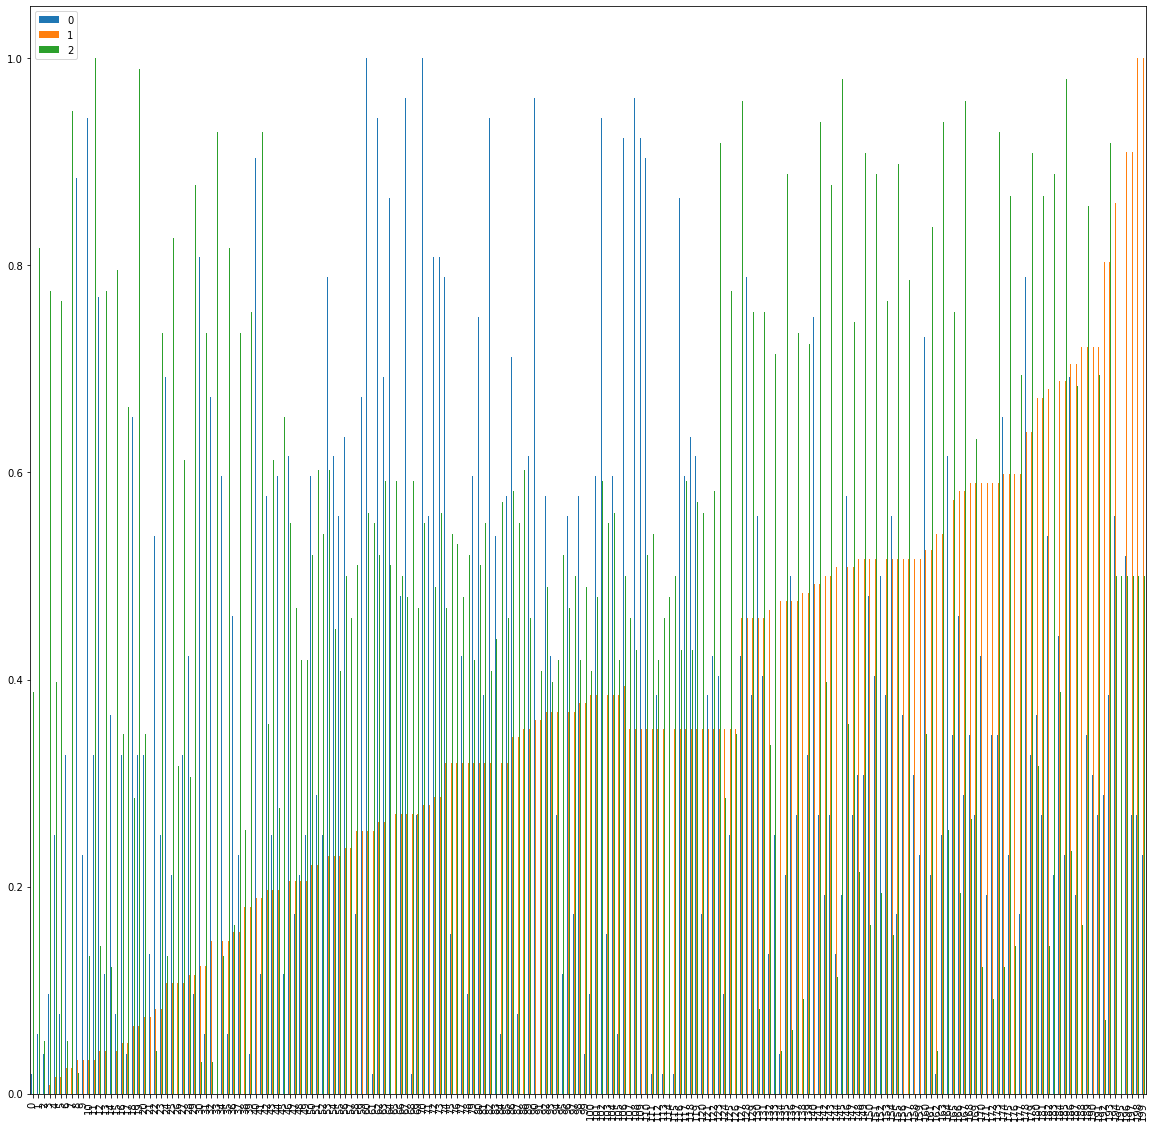

In [40]:
# Plot the dataframe
df_normalized.plot(kind='bar', figsize = (20,20))

# 6. Performing PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [42]:
pca=PCA().fit(x)
pca_data = pca.transform(df_normalized)

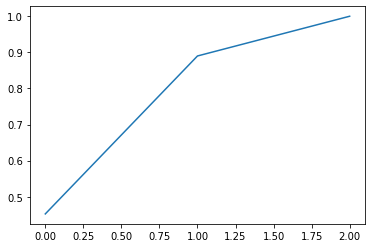

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [44]:
# Eigen Values or the variance determined by each PCs

pca.explained_variance_ratio_

array([0.45239273, 0.43753762, 0.11006965])

## 6.1 SCREE Plot  

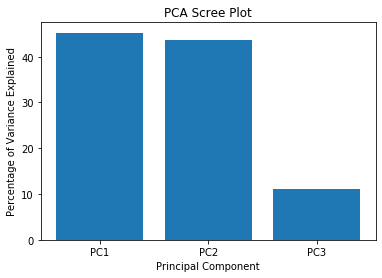

In [45]:
percent_variance=np.round(pca.explained_variance_ratio_*100, decimals=2)
columns=['PC1','PC2','PC3']
y = np.arange(len(columns))
plt.bar(columns, percent_variance)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Almost all of the variation is along the first and second PC. So, a 2-D graph using PC1 and PC2 should do a good job representing the original data.

## 6.2 My PCA Graph  

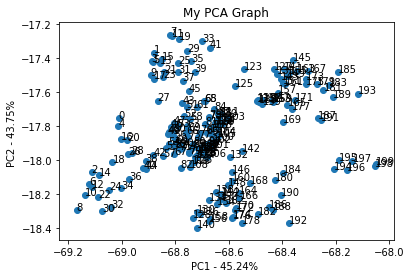

In [46]:
# To draw a PCA plot we'll first put the new co-ordinates, created by pca.transform(scaled.data) into a nice matrix
# where the rows have sample labels and columns have PC labels

pca_df = pd.DataFrame(pca_data,columns = columns)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}% '.format(percent_variance[0]))               # Draw a scatter plot with a title and nice axis labels
plt.ylabel('PC2 - {0}% '.format(percent_variance[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))   # This loop adds sample names to the graph
plt.show()

## 6.3 Data Transformation based on selected number of PCs 

In [47]:
pca_new=PCA(n_components=2)
pcs=pca_new.fit_transform(x_scaled)

In [48]:
pcs[:3]

array([[-0.20243299,  0.26397993],
       [-0.45779292, -0.07724637],
       [ 0.03504798,  0.50152414]])

In [49]:
df_pc=pd.DataFrame(data=pcs,columns=['PC1','PC2'])
df_pc.head(10)

,PC1,PC2
0,-0.202433,0.263980
1,-0.457793,-0.077246
2,0.035048,0.501524
3,-0.402114,-0.070558
4,-0.036833,0.109769
5,-0.409906,-0.049029
6,0.250587,0.317412
7,-0.517455,-0.195530
8,0.688066,-0.020308
9,-0.268044,-0.115681


In [50]:
df_pc.shape

(200, 2)

## 6.4 Combine the Target and the Principal Components 

In [51]:
target_var= df_new['Genre']

final_df=pd.concat([df_pc, target_var], axis=1)
final_df.head(10)

,PC1,PC2,Genre
0,-0.202433,0.263980,1
1,-0.457793,-0.077246,1
2,0.035048,0.501524,0
3,-0.402114,-0.070558,0
4,-0.036833,0.109769,0
5,-0.409906,-0.049029,0
6,0.250587,0.317412,0
7,-0.517455,-0.195530,0
8,0.688066,-0.020308,1
9,-0.268044,-0.115681,0


In [52]:
final_df.shape

(200, 3)

In [53]:
final_df.isna().sum()

PC1      0
PC2      0
Genre    0
dtype: int64

# 7. Standardising the Data & using KMeans Clustering

In [54]:
dataset_standardized = preprocessing.scale(df_pc)

In [55]:
df_std = pd.DataFrame(dataset_standardized, columns=df_pc.columns)

In [56]:
df_std.head()

,PC1,PC2
0,-0.668922,1.222012
1,-1.512737,-0.357588
2,0.115813,2.321649
3,-1.328752,-0.326625
4,-0.121711,0.508140


### 7.1 Finding the optimum no of clusters using Elbow Curve  

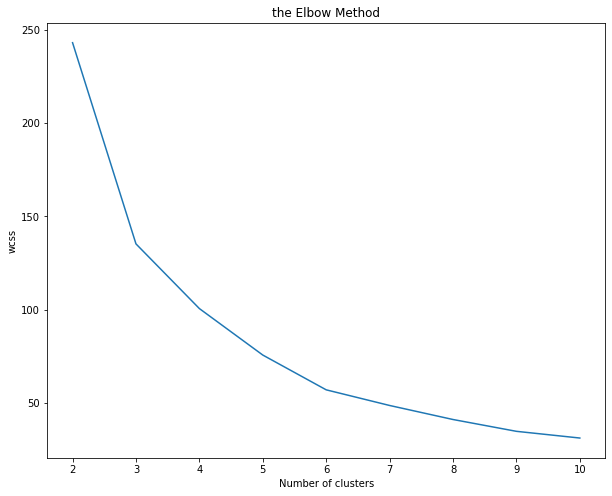

In [57]:
# Find the appropriate cluster number

plt.figure(figsize=(10,8))
from sklearn.cluster import KMeans

wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11),wcss)
plt.title("the Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [58]:
from sklearn.metrics import silhouette_score

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=99)
    pred = kmeans.fit_predict(df_std)
    score = silhouette_score (df_std, pred, metric='euclidean')
    wcss = kmeans.inertia_
    print('For n_clusters = {}, silhouette score is {} and WCSS is {}'.format(i, score, wcss))

For n_clusters = 2, silhouette score is 0.39005647784698455 and WCSS is 243.0150127977081
For n_clusters = 3, silhouette score is 0.4444688922519617 and WCSS is 135.2824093575124
For n_clusters = 4, silhouette score is 0.4411089991261886 and WCSS is 100.3211775639281
For n_clusters = 5, silhouette score is 0.4458542828370448 and WCSS is 75.76137844708258
For n_clusters = 6, silhouette score is 0.465734042262263 and WCSS is 57.13761736766838
For n_clusters = 7, silhouette score is 0.4850375855272613 and WCSS is 48.74426876227243
For n_clusters = 8, silhouette score is 0.4193100090940222 and WCSS is 41.21953543964845
For n_clusters = 9, silhouette score is 0.4145118909013592 and WCSS is 35.07712770859084
For n_clusters = 10, silhouette score is 0.42504733714870774 and WCSS is 31.26145716663602


### Model fitting using the optimal number of clusters  

In [59]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state=99)
pred = kmeans.fit_predict(df_std)
score = silhouette_score (df_std, pred, metric='euclidean')
wcss = kmeans.inertia_
print("for,n_clusters={},silhouette score is {} and wcss is {}".format(4,score,wcss))

for,n_clusters=4,silhouette score is 0.465734042262263 and wcss is 57.13761736766838


In [60]:
print(pred)  # That means 1st record goes to cluster 2 and 2nd record goes to cluster 1

[3 0 1 0 3 0 1 0 4 0 2 0 4 0 1 0 5 3 5 0 5 0 4 0 4 0 5 0 5 0 4 0 4 0 4 0 4
 0 1 0 2 0 5 0 5 3 5 3 3 3 5 0 3 2 5 5 5 2 3 5 2 3 2 2 2 3 5 2 3 3 2 5 2 2
 2 3 5 5 3 5 2 5 2 5 3 5 2 3 3 5 2 3 5 5 3 3 5 3 5 3 3 5 2 3 5 3 2 5 2 2 2
 3 5 3 3 3 2 5 5 5 3 5 5 0 1 0 5 0 4 0 4 0 3 0 1 0 4 0 1 0 4 0 3 0 1 0 5 0
 1 0 4 0 4 0 4 0 1 0 1 0 5 0 1 0 4 0 1 0 1 3 1 0 1 0 4 0 4 3 4 0 1 0 4 0 5
 0 4 3 1 0 1 3 1 0 5 3 5 3 3 3]


In [61]:
df_std.shape

(200, 2)

In [62]:
df_std['Prediction_column']=pred
df_std

,PC1,PC2,Prediction_column
0,-0.668922,1.222012,3
1,-1.512737,-0.357588,0
2,0.115813,2.321649,1
3,-1.328752,-0.326625,0
4,-0.121711,0.508140,3
...,...,...,...
195,-0.211282,0.653982,3
196,0.260991,0.118659,5
197,-0.357222,0.869517,3
198,-0.363228,0.946994,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CEFEF46B00>,
      dtype=object)

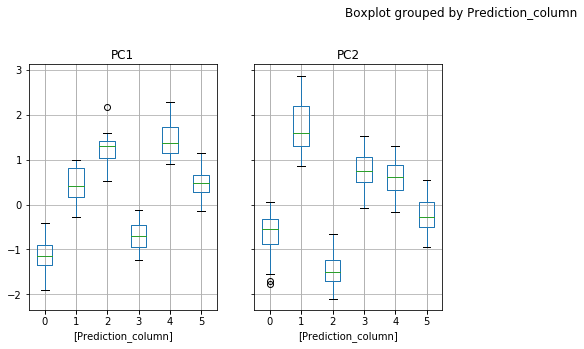

In [63]:
df_std.boxplot(by = 'Prediction_column', layout = (2,4), figsize = (15,10))

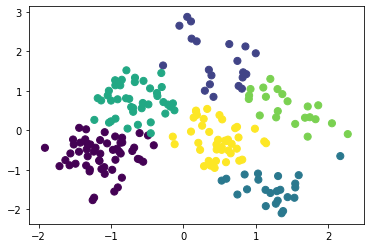

In [64]:
plt.scatter(df_std.iloc[:,0],df_std.iloc[:,1],c=df_std.Prediction_column,s=50,cmap="viridis")
plt.show()

## 7.2 Hierarchical clustering

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
# In Unsupervised learning there is no concept like model. But i've named it as model

model = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average')

In [67]:
model.fit(df_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [68]:
# labels_ function refers to the array to which cluster labels have been stored. Here array size is 6.

df_std['labels'] = model.labels_

In [69]:
df_std.groupby(['labels']).count()

,PC1,PC2,Prediction_column
labels,,,
0,23,23,23
1,20,20,20
2,21,21,21
3,54,54,54
4,41,41,41
5,41,41,41


In [70]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [71]:
from scipy.spatial.distance import pdist  # Pairwise distribution between data points

In [72]:
# cophenet index is the measure of the correlation between the distance of data points and dendrogrammic distance between 
# data points. Closer it is to 1, the better is the clustering.

Z =  linkage(df_std, 'average')
c, coph_dists = cophenet(Z, pdist(df_std))

c


# Here 'average linkage' method is used as it is giving the good cophenet index value.

0.8973158000362912

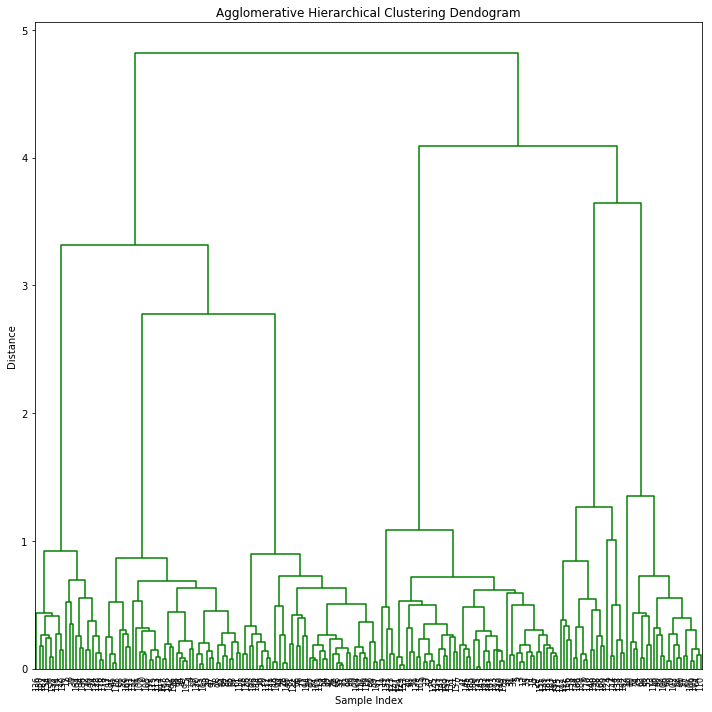

In [73]:
plt.figure(figsize = (10,10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold = 40, leaf_font_size = 8.)
plt.tight_layout()

# 8. Hierarchical clustering on raw data

In [74]:
df_new.head(50)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [75]:
# Normalizing the dataset

from sklearn.preprocessing import normalize
df_new_scaled = normalize(df_new)
df_new_scaled = pd.DataFrame(df_new_scaled, columns=df_new.columns)
df_new_scaled.head(50)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.021780,0.413826,0.326705,0.849433
1,0.011762,0.247008,0.176434,0.952743
2,0.000000,0.760286,0.608229,0.228086
3,0.000000,0.280697,0.195267,0.939723
4,0.000000,0.580683,0.318439,0.749269
5,0.000000,0.271854,0.210069,0.939131
6,0.000000,0.879131,0.452124,0.150708
7,0.000000,0.233662,0.182866,0.954967
8,0.014962,0.957573,0.284280,0.044886
9,0.000000,0.373689,0.236669,0.896853


In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
# In Unsupervised learning there is no concept like model. But i've named it as model

model1 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average')

In [78]:
model1.fit(df_new_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [79]:
# labels_ function refers to the array to which cluster labels have been stored. Here array size is 6.

df_new_scaled['labels'] = model.labels_

In [80]:
df_new_scaled.groupby(['labels']).count()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
labels,,,,
0,23,23,23,23
1,20,20,20,20
2,21,21,21,21
3,54,54,54,54
4,41,41,41,41
5,41,41,41,41


In [81]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [82]:
from scipy.spatial.distance import pdist  # Pairwise distribution between data points

In [83]:
# cophenet index is the measure of the correlation between the distance of data points and dendrogrammic distance between 
# data points. Closer it is to 1, the better is the clustering.

Z1 =  linkage(df_new_scaled, 'average')
c1, coph_dists = cophenet(Z1, pdist(df_new_scaled))

c1


# Here 'average linkage' method is used as it is giving the good cophenet index value.

0.8168064263706194

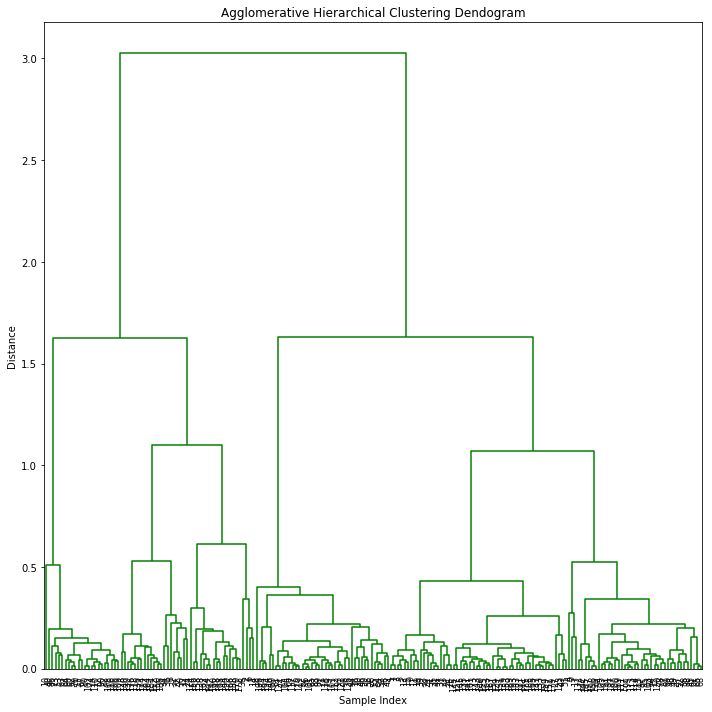

In [84]:
plt.figure(figsize = (10,10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90., color_threshold = 40, leaf_font_size = 8.)
plt.tight_layout()

#  8.1. Standardising the Data & KMeans Clustering

In [86]:
dataset_standardized = preprocessing.scale(df_new_scaled)

In [87]:
df_new_scaled = pd.DataFrame(dataset_standardized, columns=df_new_scaled.columns)

In [88]:
df_new_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,3.152210,-0.143785,-1.611546,1.328646,0.646399
1,1.337283,-1.031871,-2.417758,1.765425,0.021859
2,-0.793630,1.700645,-0.101158,-1.298315,-1.227220
3,-0.793630,-0.852522,-2.316717,1.710379,0.021859
4,-0.793630,0.744502,-1.655893,0.905166,0.646399


### 8.1 Finding the optimum no of clusters using Elbow Curve  

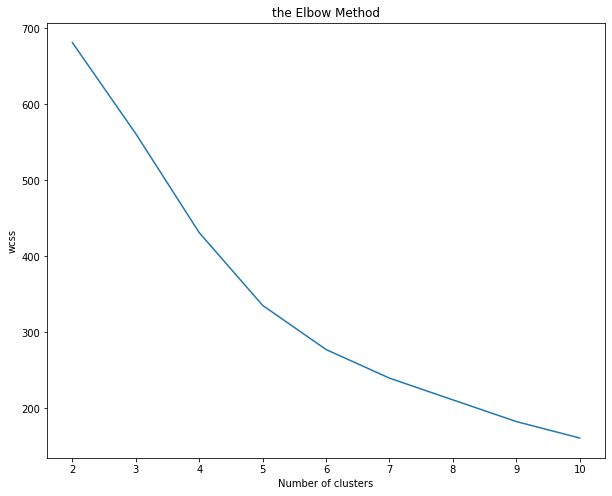

In [89]:
# Find the appropriate cluster number

plt.figure(figsize=(10,8))
from sklearn.cluster import KMeans

wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(df_new_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11),wcss)
plt.title("the Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [90]:
from sklearn.metrics import silhouette_score

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=99)
    pred = kmeans.fit_predict(df_new_scaled)
    score = silhouette_score (df_new_scaled, pred, metric='euclidean')
    wcss = kmeans.inertia_
    print('For n_clusters = {}, silhouette score is {} and WCSS is {}'.format(i, score, wcss))

For n_clusters = 2, silhouette score is 0.35275194612798033 and WCSS is 681.2941242858169
For n_clusters = 3, silhouette score is 0.3565864228336258 and WCSS is 547.8434909799495
For n_clusters = 4, silhouette score is 0.35265758343345666 and WCSS is 431.21106450182026
For n_clusters = 5, silhouette score is 0.3979283484492852 and WCSS is 334.04711063317063
For n_clusters = 6, silhouette score is 0.4022185483593627 and WCSS is 277.6262220059804
For n_clusters = 7, silhouette score is 0.4113085068575437 and WCSS is 239.80946305014064
For n_clusters = 8, silhouette score is 0.4356485125935972 and WCSS is 210.8332795367191
For n_clusters = 9, silhouette score is 0.4516375756759453 and WCSS is 182.6020365283965
For n_clusters = 10, silhouette score is 0.4654509805744918 and WCSS is 160.82163707445966


### Model fitting using the optimal number of clusters  

In [91]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state=99)
pred = kmeans.fit_predict(df_new_scaled)
score = silhouette_score (df_new_scaled, pred, metric='euclidean')
wcss = kmeans.inertia_
print("for,n_clusters={},silhouette score is {} and wcss is {}".format(6,score,wcss))

for,n_clusters=6,silhouette score is 0.4022185483593627 and wcss is 277.6262220059804


In [92]:
print(pred)  # That means 1st record goes to cluster 2 and 2nd record goes to cluster 1

[0 5 4 5 5 5 4 5 4 5 4 5 4 5 4 5 2 5 2 5 2 5 4 5 4 5 2 0 2 5 4 5 4 5 4 5 4
 5 4 5 4 5 0 5 2 5 2 2 2 2 2 0 2 4 2 0 2 4 1 0 4 0 4 4 4 0 2 4 0 2 4 2 4 4
 4 0 2 0 1 2 4 0 4 2 1 0 4 1 1 2 4 0 0 2 1 0 2 1 0 0 1 2 4 0 0 1 4 0 4 4 4
 1 2 0 1 1 4 2 2 2 0 2 2 0 3 1 0 0 3 0 3 0 1 1 3 1 3 0 3 1 3 0 1 1 3 0 0 1
 3 0 3 0 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 0 3 0 3 1 3 0 3 0 3 1 3 1 1
 0 3 0 3 1 3 1 3 1 1 1 1 1 1 1]


In [93]:
df_new_scaled.shape

(200, 5)

In [94]:
df_new_scaled['Prediction_column']=pred
df_new_scaled

,Genre,Age,Annual Income (k$),Spending Score (1-100),labels,Prediction_column
0,3.152210,-0.143785,-1.611546,1.328646,0.646399,0
1,1.337283,-1.031871,-2.417758,1.765425,0.021859,5
2,-0.793630,1.700645,-0.101158,-1.298315,-1.227220,4
3,-0.793630,-0.852522,-2.316717,1.710379,0.021859,5
4,-0.793630,0.744502,-1.655893,0.905166,0.646399,5
...,...,...,...,...,...,...
195,-0.793630,-0.962845,1.417735,-0.692444,0.646399,1
196,-0.793630,-0.669608,1.368469,-0.782621,1.270938,1
197,0.507027,-1.123794,1.488910,-0.744958,0.646399,1
198,0.419705,-1.205906,1.558330,-0.846849,0.646399,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE831D85C0>,
      dtype=object)

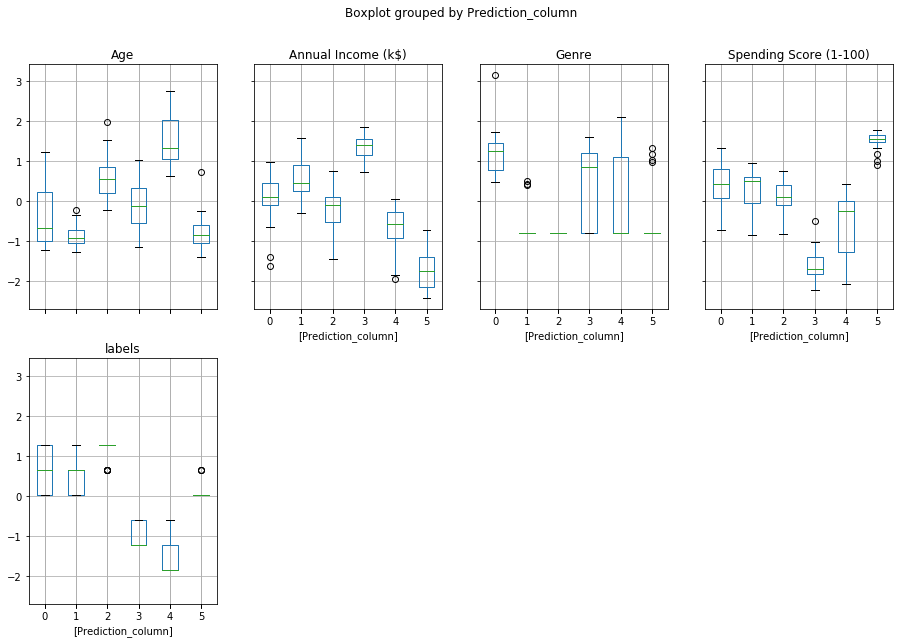

In [95]:
df_new_scaled.boxplot(by = 'Prediction_column', layout = (2,4), figsize = (15,10))

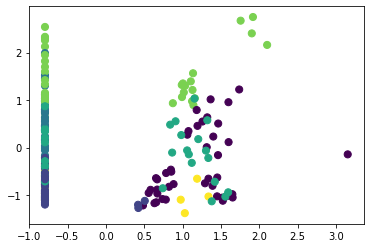

In [97]:
plt.scatter(df_new_scaled.iloc[:,0],df_new_scaled.iloc[:,1],c=df_new_scaled.Prediction_column,s=50,cmap="viridis")
plt.show()